In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
file_path = "/content/drive/MyDrive/machine learning/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(file_path)
print(df.head())


    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [9]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build SVM (RBF)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Evaluate
y_pred = svm_rbf.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[49  7  0  0  0  0  0]
 [18 21  0  0  0 20  3]
 [ 0  0 26  7 21  1 23]
 [ 0  0  5 24 29  0  0]
 [ 0  0  0  0 63  0  0]
 [ 2 14  0  0  0 27 13]
 [ 0  2  9  0  0 10 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.41      0.54        58
           4       0.56      1.00      0.72        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.59      0.57      0.54       423



In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='weighted')
    rec = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    results[k] = [acc, prec, rec, f1]
    print(f"\n{k.upper()} Kernel -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")


LINEAR Kernel -> Accuracy: 0.8865, Precision: 0.8906, Recall: 0.8865, F1: 0.8830

POLY Kernel -> Accuracy: 0.5721, Precision: 0.5895, Recall: 0.5721, F1: 0.5565

RBF Kernel -> Accuracy: 0.5650, Precision: 0.5851, Recall: 0.5650, F1: 0.5445

SIGMOID Kernel -> Accuracy: 0.0355, Precision: 0.1372, Recall: 0.0355, F1: 0.0297


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


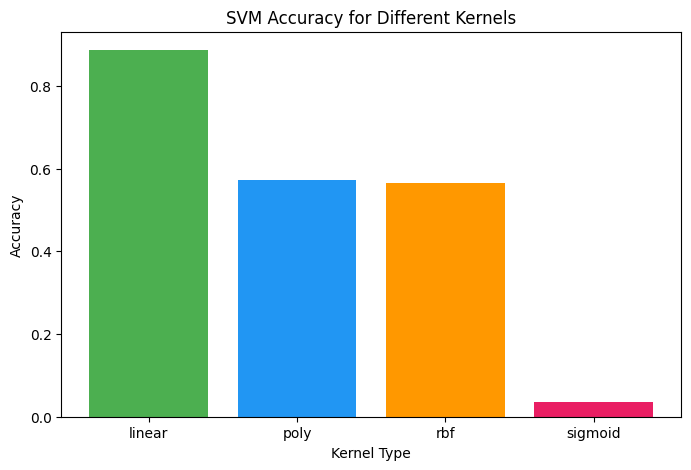

In [11]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), [results[k][0] for k in results.keys()],
        color=['#4CAF50','#2196F3','#FF9800','#E91E63'])
plt.title('SVM Accuracy for Different Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.show()

In [12]:
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in kernels:
    model = SVC(kernel=k, C=1.0, gamma='scale')
    acc = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    prec = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted').mean()
    rec = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted').mean()
    cv_results[k] = [acc, prec, rec, f1]

print("\n5-Fold Cross-Validation Results:")
for k, v in cv_results.items():
    print(f"{k} -> Accuracy: {v[0]:.4f}, Precision: {v[1]:.4f}, Recall: {v[2]:.4f}, F1: {v[3]:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


5-Fold Cross-Validation Results:
linear -> Accuracy: 0.8787, Precision: 0.8810, Recall: 0.8787, F1: 0.8765
poly -> Accuracy: 0.5974, Precision: 0.6097, Recall: 0.5974, F1: 0.5865
rbf -> Accuracy: 0.5609, Precision: 0.5783, Recall: 0.5609, F1: 0.5506
sigmoid -> Accuracy: 0.0303, Precision: 0.0985, Recall: 0.0303, F1: 0.0164


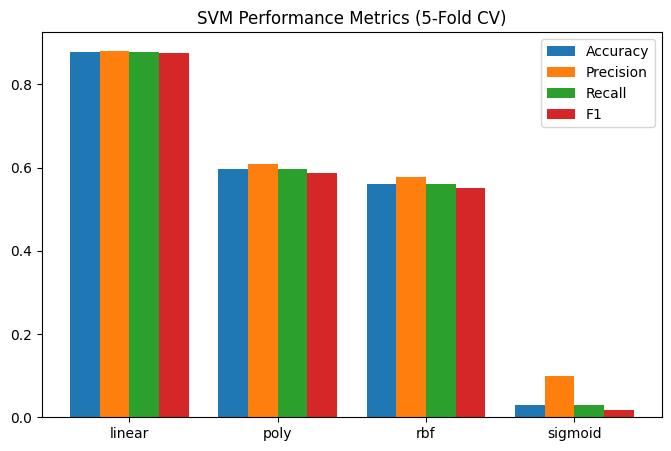

In [13]:
x = np.arange(len(kernels))
width = 0.2
plt.figure(figsize=(8,5))
plt.bar(x-0.3, [cv_results[k][0] for k in kernels], width, label='Accuracy')
plt.bar(x-0.1, [cv_results[k][1] for k in kernels], width, label='Precision')
plt.bar(x+0.1, [cv_results[k][2] for k in kernels], width, label='Recall')
plt.bar(x+0.3, [cv_results[k][3] for k in kernels], width, label='F1')
plt.xticks(x, kernels)
plt.title('SVM Performance Metrics (5-Fold CV)')
plt.legend()
plt.show()

In [14]:
print("\nFirst 5 Support Vector Indices (RBF):")
print(svm_rbf.support_[:5])
print("\nFirst 5 Support Vectors (RBF):\n")
print(svm_rbf.support_vectors_[:5])


First 5 Support Vector Indices (RBF):
[ 9 59 67 93 99]

First 5 Support Vectors (RBF):

[[22.99368   0.        1.741377 54.877111  3.        1.        3.
   3.        0.        0.        2.009796  1.        2.        0.071317
   1.        3.      ]
 [17.405104  1.        1.82525  58.913579  3.        1.        2.580872
   3.887906  0.        0.        2.        1.        2.        0.453649
   2.        0.      ]
 [21.478496  0.        1.686936 51.256059  3.        1.        3.
   3.179995  0.        0.        1.910378  1.        0.480614  0.625079
   1.        3.      ]
 [18.128249  1.        1.699437 52.08657   2.        1.        2.853513
   3.        0.        0.        2.        1.        0.680464  1.258881
   2.        3.      ]
 [17.469417  1.        1.798645 59.612717  3.        1.        2.336044
   4.        0.        0.        2.        1.        2.        0.133005
   2.        0.      ]]
